# A Look at terrorism globaly and accross the US
## Mikpongbeho Antoine Vignon

# 1. Introduction
    We ought to analyze global trends on terrorism and answer questions such as which countries suffer most from terrorism? Has terrorism activities increased globally? How many victims terrorist activities claim each year? Then we will try to predict terrorist activities using machine learning techniques. We will visualize terrorist activities globally and in the US, analyze global and local terrorist activities data, and predict terrorist activities in the US. Our data is obtained from The Global Terrorism Database (GTD) and includes terrorism data from 1970 to 2018. The main tools used are Pandas data frames, Folium for visualization, Numpy and Scipy for machine learning.
    We hope this work is insightful and enable us in the future to accurately predict and prevent terrorist attacks.

### Python libraries and packages required and How to install them.

- pip install folium
- pip install pandas
- pip install matplotlib
- pip install html5lib
- pip install numpy, scipy, scikit-learn

##### For more information, refer to the following links for installation.
1. https://pandas.pydata.org/pandas-docs/stable/install.html
2. https://docs.python.org/3/
3. https://scikit-learn.org/stable/install.html
4. https://pypi.org/project/folium/

#### Importing the libraries and modules.

In [2]:
import folium
from folium.plugins import MarkerCluster
import requests
import pandas as pandas
import numpy as numpy
import re
import html5lib
from datetime import datetime
from bs4 import BeautifulSoup
import json
import matplotlib.pyplot as plot
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# 2. Data Collection

    To obtain the data on terrorist attacks, we registered an account on the Global Terrorism Database (GTD) website. Afterward, we had access to the data on terrorist attacks between 1970 – 2018. After downloading the data, we use Microsoft Excel to convert it into CSV. Then we load the data into python a Pandas Dataframe.
    The following code loads the data into a Pandas Dataframe and prints the first few data points.
    
    Download Data Here: 
    https://www.start.umd.edu/gtd/

In [5]:
input_file = "globalterrorismdb_0919csv.csv"
global_terrorism_data = pandas.read_csv(input_file)
global_terrorism_data.head(5) 

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

    The following code prints out the size of our data.

In [6]:
global_terrorism_data.shape

(191464, 135)

    Our data is composed of 191464 rows and 135 columns. However, there are several missing values points from the data and several columns we will not be used for our analysis. We can start by selecting only the necessary columns from the dataset and then removing any missing value where it makes sense to do so. For example, we will remove any row with missing year and location.

In [7]:
columns_needed = ["iyear", "imonth", "iday", "country", "country_txt", "region", "region_txt", "provstate",
                  "city", "latitude", "longitude", "targtype1", "targtype1_txt", "attacktype1",
                  "attacktype1_txt", "success", "nkill", "nwound", "gname", "claimed", "weaptype1", "weaptype1_txt"]

# Using Pandas dataframe to create new dataframe from our previous one. 
global_terrorism_data_needed = pandas.DataFrame(global_terrorism_data, columns = columns_needed)

# Drop rows with any missing year and location in the selected columns
global_terrorism_data_needed = global_terrorism_data_needed.dropna(how='any', subset=['latitude', 'longitude', "iyear"])

# Lets look at the size of our data now
global_terrorism_data_needed.shape

(186883, 22)

In [8]:
# lets take a few data points
global_terrorism_data_needed.head()

iyear  imonth  iday  country         country_txt  region  \
0   1970       7     2       58  Dominican Republic       2   
1   1970       0     0      130              Mexico       1   
2   1970       1     0      160         Philippines       5   
3   1970       1     0       78              Greece       8   
4   1970       1     0      101               Japan       4   

                    region_txt provstate           city   latitude  ...  \
0  Central America & Caribbean  National  Santo Domingo  18.456792  ...   
1                North America   Federal    Mexico city  19.371887  ...   
2               Southeast Asia    Tarlac        Unknown  15.478598  ...   
3               Western Europe    Attica         Athens  37.997490  ...   
4                    East Asia   Fukouka        Fukouka  33.580412  ...   

                 targtype1_txt  attacktype1                 attacktype1_txt  \
0  Private Citizens & Property            1                   Assassination   
1      Government (Diplomatic)            6     Hostage Taking (Kidnapping)   
2          Journalists & Media            1                   Assassination   
3      Government (Diplomatic)            3               Bombing/Explosion   
4      Government (Diplomatic)            7  Facility/Infrastructure Attack   

   success nkill  nwound                               gname  claimed  \
0        1   1.0     0.0                              MANO-D      NaN   
1        1   0.0     0.0  23rd of September Communist League      NaN   
2        1   1.0     0.0                             Unknown      NaN   
3        1   NaN     NaN                             Unknown      NaN   
4        1   NaN     NaN                             Unknown      NaN   

  weaptype1  weaptype1_txt  
0        13        Unknown  
1        13        Unknown  
2        13        Unknown  
3         6     Explosives  
4         8     Incendiary  

[5 rows x 22 columns]

# 3. Data Visualization, Exploration And Analysis

    We first need to look at the number of attacks every year and see if there is any trend. Then we can look at the number of attack by continent/country. To do this, we simply group our data using the variable we need and plot it.

In [9]:
# Using Pandas dataframe feature to count the number of attack by year
global_terrorism_year_counts = global_terrorism_data_needed.groupby('iyear').size().reset_index(name='attack_counts')
global_terrorism_year_counts.shape

(48, 2)

In [10]:
global_terrorism_year_counts.head()

iyear  attack_counts
0   1970            643
1   1971            463
2   1972            551
3   1973            465
4   1974            577

Let's plot the result to take better look.

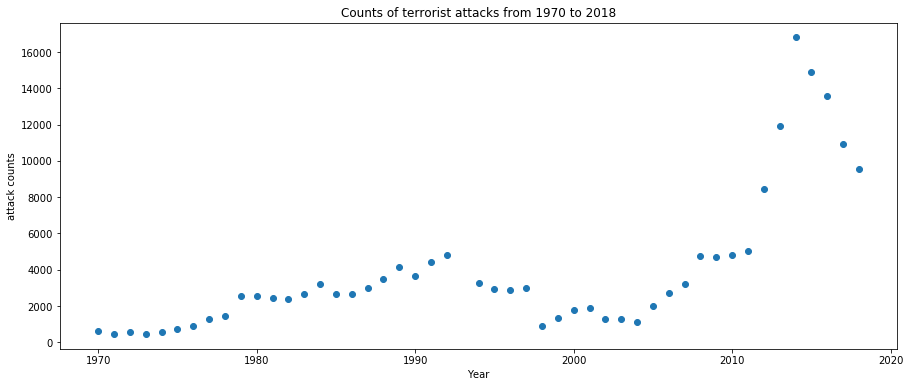

In [11]:
plot.figure(figsize=(15,6))
plot.title('Counts of terrorist attacks from 1970 to 2018')
plot.xlabel('Year')
plot.ylabel('attack counts')
plot.scatter("iyear", "attack_counts", data = global_terrorism_year_counts);

    There is no obvious trend to note here. According to the plot, terrorist attacks were on the rise until 1992 then we see a decline up to 2004 followed by a sudden increase in terrorist activities from 2010 to 2014 reaching a peak in 2014. Then a steady decrease from 2015 to 2018. This trend could be the result of several global variables that are not present in our data.
    Next, we look at the number of attacks per region.

In [12]:
# group by region
global_terrorism_region_counts = global_terrorism_data.groupby(['region', 'region_txt']).size().reset_index(name='attack_counts')
global_terrorism_region_counts

region                   region_txt  attack_counts
0        1                North America           3579
1        2  Central America & Caribbean          10359
2        3                South America          19292
3        4                    East Asia            808
4        5               Southeast Asia          13363
5        6                   South Asia          48266
6        7                 Central Asia            571
7        8               Western Europe          16843
8        9               Eastern Europe           5217
9       10   Middle East & North Africa          53110
10      11           Sub-Saharan Africa          19752
11      12        Australasia & Oceania            304

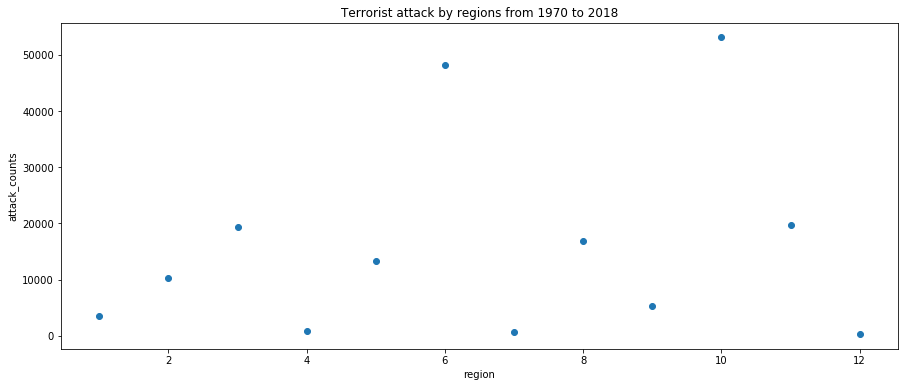

In [13]:
# the plot of attacks by region
plot.figure(figsize=(15,6))
plot.title('Terrorist attack by regions from 1970 to 2018')
plot.xlabel('region')
plot.ylabel('attack_counts')
plot.scatter("region", "attack_counts", data = global_terrorism_region_counts);

    Most attacks are concentrated in South Asia, Middle East and North Africa. Australia and Oceania have the lowest number of attack. It will be interesting to see how target regions changed over time. Let show that with a histogram.

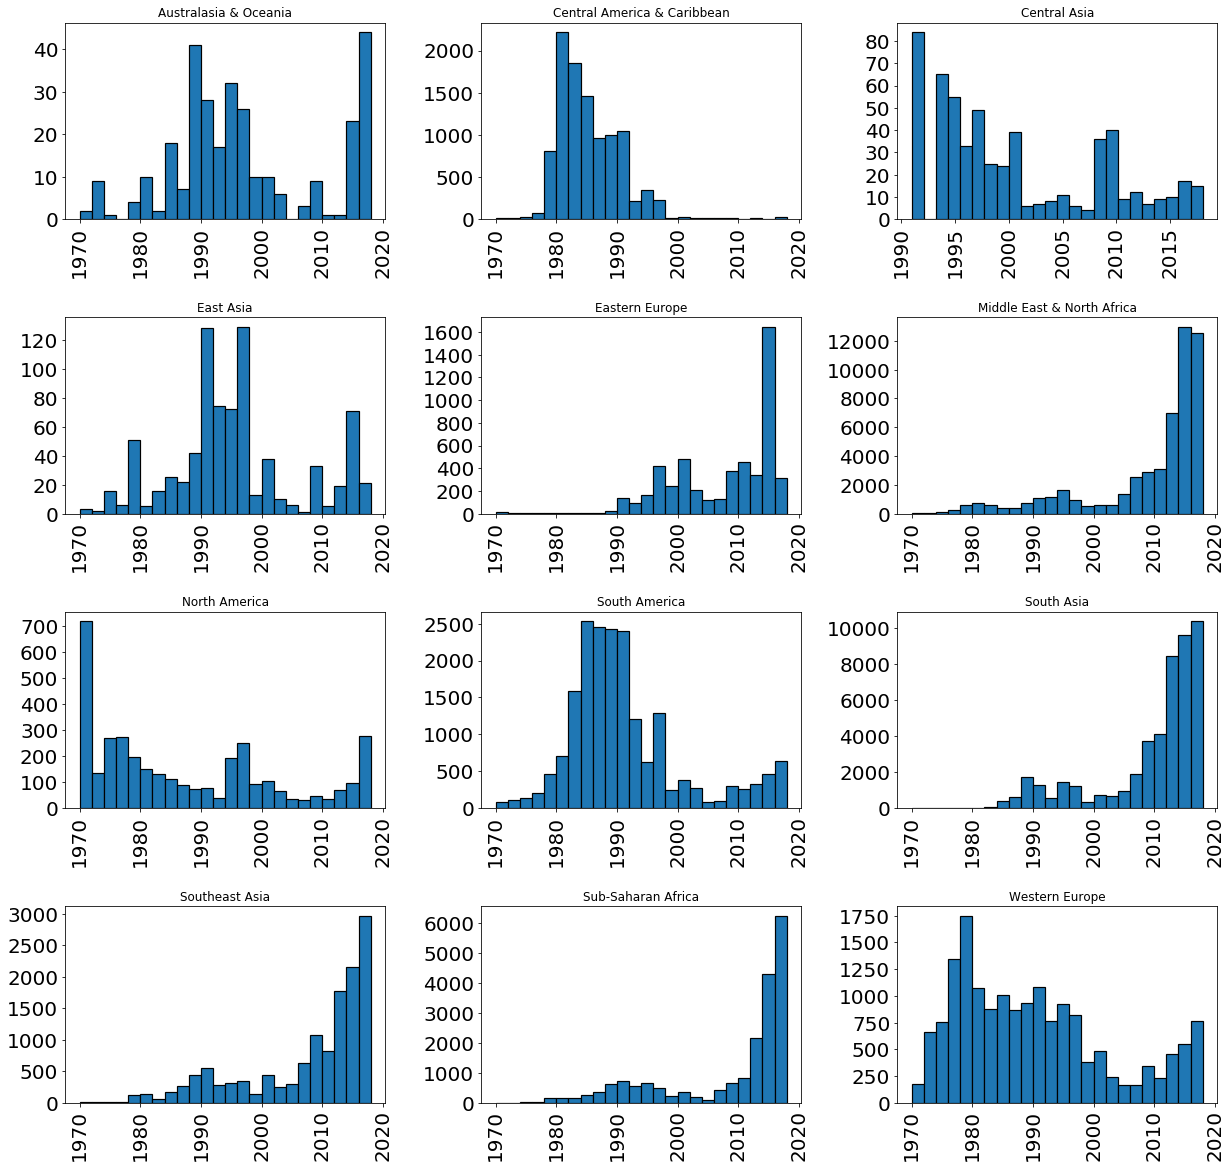

In [14]:
plot_region = global_terrorism_data['iyear'].hist(by=global_terrorism_data['region_txt'], figsize =(20,20),
                                                       ylabelsize = 20, xlabelsize = 20, edgecolor='black', linewidth=1.2,
                                                       bins = 24 )

    The highest number of attacks in North America occurred between 1970 and 1972. During that time, there was almost no attack in other regions besides Western Europe. The regions with the most between 2010 and 2018 were not under attack then. Compared to the Middle East, North Africa, Sub-Saharian Africa, South Asia, Southeast Asia, or even Western Europe, the number of attacks in North America is pretty low. Now Lets look at the distribution by country.

In [15]:
# number of attacks by country
global_terrorism_country_counts = global_terrorism_data.groupby('country_txt').size().reset_index(name='attack_counts')
global_terrorism_country_counts

country_txt  attack_counts
0    Afghanistan          14509
1        Albania             80
2        Algeria           2749
3        Andorra              1
4         Angola            499
..           ...            ...
200        Yemen           3673
201   Yugoslavia            203
202        Zaire             50
203       Zambia             62
204     Zimbabwe            103

[205 rows x 2 columns]

In [16]:
global_terrorism_country_counts.agg([max, min])

country_txt  attack_counts
max     Zimbabwe          26057
min  Afghanistan              1

Next we look at the type of attack and the target of attacks.

In [17]:
global_terrorism_attacktype_counts = global_terrorism_data.groupby('attacktype1_txt').size().reset_index(name='attack_counts')
global_terrorism_attacktype_counts

attacktype1_txt  attack_counts
0                        Armed Assault          45251
1                        Assassination          20117
2                    Bombing/Explosion          91842
3       Facility/Infrastructure Attack          11017
4                            Hijacking            688
5  Hostage Taking (Barricade Incident)           1048
6          Hostage Taking (Kidnapping)          12138
7                      Unarmed Assault           1096
8                              Unknown           8267

In [18]:
global_terrorism_targettype_counts = global_terrorism_data.groupby('targtype1_txt').size().reset_index(name='attack_counts')
global_terrorism_targettype_counts

targtype1_txt  attack_counts
0                 Abortion Related            265
1              Airports & Aircraft           1363
2                         Business          21277
3          Educational Institution           4500
4             Food or Water Supply            330
5          Government (Diplomatic)           3664
6             Government (General)          22274
7              Journalists & Media           3072
8                         Maritime            371
9                         Military          29978
10                             NGO           1020
11                           Other            148
12                          Police          26023
13     Private Citizens & Property          46283
14  Religious Figures/Institutions           4693
15               Telecommunication           1052
16    Terrorists/Non-State Militia           3207
17                        Tourists            449
18                  Transportation           6929
19                         Unknown           6449
20                       Utilities           6158
21         Violent Political Party           1959

We can better visualize these results by plotting the number of occurrences of each attack type per year on a histogram.

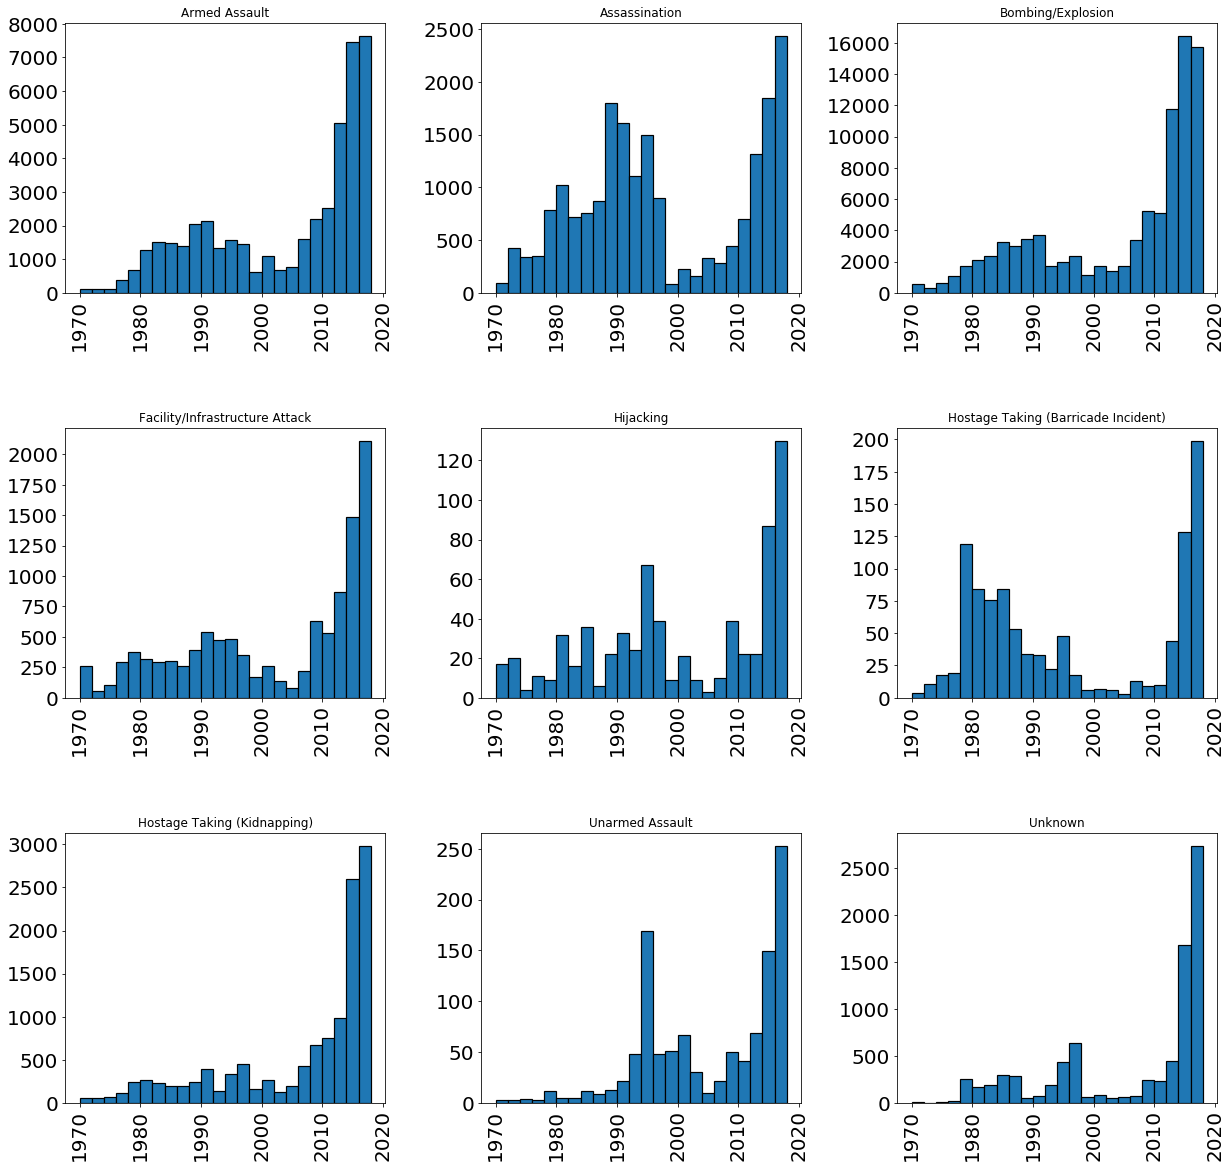

In [19]:
plot_attack = global_terrorism_data['iyear'].hist(by=global_terrorism_data['attacktype1_txt'], figsize =(20,20),
                                                       ylabelsize = 20, xlabelsize = 20, edgecolor='black', linewidth=1.2,
                                                       bins = 24)

 ### A few observations:
    Globally all attack types have increased. The most growth is between 2014 and 2018. Bombing/ Explosion attacks have the most increase.
    Lets show attacks on each region on a map. We will use folium to generate the map.
    Folium is a data visualization library in Python built primarily to help visualize geospatial data. With Folium, we can create a map of any location in the world as long as its latitude and longitude values are known. Also, the maps created by Folium are interactive, so we can zoom in and out after the map is rendered, which is a very useful feature.
    Since we are workin with geospatial maps, we need the country coordinates for plotting. Download the file from https://github.com/python-visualization/folium/blob/master/examples/data/world-countries.json

In [32]:
#Plot of the first 1000 attack in 1970, 1990, 2000, 2014, and 2018.
global_terrorism_1970 = global_terrorism_data_needed.groupby('iyear').get_group(1970)
global_terrorism_1990 = global_terrorism_data_needed.groupby('iyear').get_group(1990)
global_terrorism_2000 = global_terrorism_data_needed.groupby('iyear').get_group(2000)
global_terrorism_2014 = global_terrorism_data_needed.groupby('iyear').get_group(2014)
global_terrorism_2018 = global_terrorism_data_needed.groupby('iyear').get_group(2018)

In [35]:
# Initialize the global map using foolium
latitude = 0.0
longitude = 50
global_map_1970 = folium.Map(location=[latitude, longitude], zoom_start=1.5)
cluster = MarkerCluster().add_to(global_map_1970)

# Showing the first 1000 data points
size = 1000
for each in global_terrorism_1970[0:size].iterrows():
    folium.Marker([each[1]['latitude'],each[1]['longitude']],
                      popup=('City: ' + str(each[1]['city']).capitalize() + '<br>'
                             'Target: ' + str(each[1]['targtype1_txt']) + '<br>'
                             'Attack Type: ' + str(each[1]['attacktype1_txt']).capitalize() + '<br>')
                 ).add_to(cluster)

global_map_1970

In [36]:
# Initialize the global map using foolium
latitude = 0.0
longitude = 50
global_map_1990 = folium.Map(location=[latitude, longitude], zoom_start=1.5)
cluster = MarkerCluster().add_to(global_map_1990)

# Showing the first 1000 data points
size = 1000
for each in global_terrorism_1990[0:size].iterrows():
    folium.Marker([each[1]['latitude'],each[1]['longitude']],
                      popup=('City: ' + str(each[1]['city']).capitalize() + '<br>'
                             'Target: ' + str(each[1]['targtype1_txt']) + '<br>'
                             'Attack Type: ' + str(each[1]['attacktype1_txt']).capitalize() + '<br>')
                 ).add_to(cluster)

global_map_1990

In [37]:
# Initialize the global map using foolium
latitude = 0.0
longitude = 50
global_map_2000 = folium.Map(location=[latitude, longitude], zoom_start=1.5)
cluster = MarkerCluster().add_to(global_map_2000)

# Showing the first 1000 data points
size = 1000
for each in global_terrorism_2000[0:size].iterrows():
    folium.Marker([each[1]['latitude'],each[1]['longitude']],
                      popup=('City: ' + str(each[1]['city']).capitalize() + '<br>'
                             'Target: ' + str(each[1]['targtype1_txt']) + '<br>'
                             'Attack Type: ' + str(each[1]['attacktype1_txt']).capitalize() + '<br>')
                 ).add_to(cluster)

global_map_2000

In [39]:
# Initialize the global map using foolium
latitude = 0.0
longitude = 50
global_map_2014 = folium.Map(location=[latitude, longitude], zoom_start=1.5)
cluster = MarkerCluster().add_to(global_map_2014)

# Showing the first 1000 data points
size = 1000
for each in global_terrorism_2014[0:size].iterrows():
    folium.Marker([each[1]['latitude'],each[1]['longitude']],
                      popup=('City: ' + str(each[1]['city']).capitalize() + '<br>'
                             'Target: ' + str(each[1]['targtype1_txt']) + '<br>'
                             'Attack Type: ' + str(each[1]['attacktype1_txt']).capitalize() + '<br>')
                 ).add_to(cluster)

global_map_2014

In [40]:

# Initialize the global map using foolium
latitude = 0.0
longitude = 50
global_map_2018 = folium.Map(location=[latitude, longitude], zoom_start=1.5)
cluster = MarkerCluster().add_to(global_map_2018)

# Showing the first 1000 data points
size = 1000
for each in global_terrorism_2018[0:size].iterrows():
    folium.Marker([each[1]['latitude'],each[1]['longitude']],
                      popup=('City: ' + str(each[1]['city']).capitalize() + '<br>'
                             'Target: ' + str(each[1]['targtype1_txt']) + '<br>'
                             'Attack Type: ' + str(each[1]['attacktype1_txt']).capitalize() + '<br>')
                 ).add_to(cluster)

global_map_2018

# 5. Machine Learning and Predictions

Let us explore the possibility of relationship between the attacks and the year variable. From the plot Counts of terrorist attacks from 1970 to 2018 it is obvious that a linear relationship is not expected but maybe other variable such as region wouold would be impactfut to describe the relationship.
First we apply a linear model to our data. Linear regression module from sklearn is very usefull here.

In [20]:
X = global_terrorism_year_counts.iyear.values
Y = global_terrorism_year_counts.attack_counts.values
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)
reg = LinearRegression().fit(X, Y)

reg.score(X, Y)
#reg.coef

0.47091829906167015

We can look at the plot to see that this is not a good regression for our data.

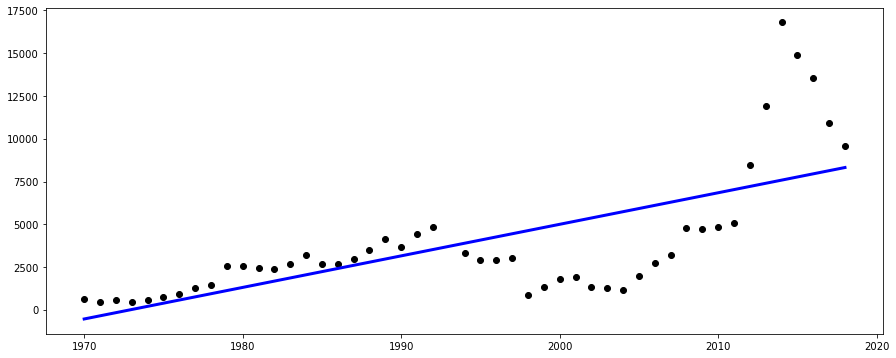

In [21]:
plot.figure(figsize=(15,6))
plot.scatter(X, Y,  color='black')
plot.plot(X, reg.predict(X), color='blue', linewidth=3)
plot.show()

Using statsmodels api, we can get more info on the regression.

In [22]:
models = sm.OLS(Y,X)
results = models.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.512
Model:                            OLS   Adj. R-squared (uncentered):              0.501
Method:                 Least Squares   F-statistic:                              49.22
Date:                Mon, 16 Dec 2019   Prob (F-statistic):                    7.73e-09
Time:                        20:57:59   Log-Likelihood:                         -464.05
No. Observations:                  48   AIC:                                      930.1
Df Residuals:                      47   BIC:                                      932.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

 #### Interpretation of the table
    First, we have the dependent variable and the model and the method. OLS stands for Ordinary Least Squares and the method “Least Squares” means that we’re trying to fit a regression line that would minimize the square of the distance from the regression line.
    The coefficient of 1.9619 means as the RM variable increases by 1, the predicted value of MDEV increases by 1.9619. A few other important values are the R-squared, the percentage of variance our model explains. Here it is very low which suggests that this is a bad fit; the standard error which is the standard deviation of the sampling distribution from the mean is very large indicating the bag fit.
    We can add the region variable and check for improvement. However, the region data is missing several variables. We can obtain another data set by grouping by years and region.
    Also, further analysis would focus on the US and analyze the relationship between the number of attacks, the attack type, the location of attacks, the type of attack and more.